# 案例1：合成的一维数据集并对其进行KMeans聚类

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


kmeans.inertia_:125.18881591730906
pre:[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 1 1 0 1]


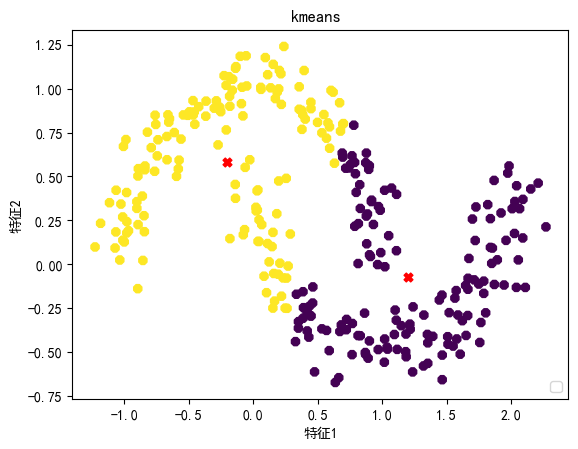

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
# 一个单元格里面所有变量都会输出
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['font.sans-serif'] = 'SimHei'#宋体，显示中文
plt.rcParams['axes.unicode_minus'] = False

# 生成make_moons数据集
# n_samples=300 指定生成300个数据点
# noise=0.1 添加噪声的标准差为0.1，噪声的引入是为了使数据点不完全对称，增加现实世界数据的复杂性
# random_state=42 确保每次生成的数据都是一样的
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# 使用KMeans进行聚类
# n_clusters=2 指定需要找到的聚类数为2，因为make_moons数据自然分为两个部分
# n_init=10 表示KMeans算法会运行10次，每次都重新选择初始聚类中心，最终选择最佳的一次结果（即具有最小内聚度的一次）
#max_iter相当于深度学习里面的epochs
kmeans=KMeans(n_clusters=2,n_init=10,random_state=42,max_iter=100) 
y_pre=kmeans.fit_predict(X)#不需要标签所以可以直接训练和预测，对数据进行拟合和预测每一个点的标签
print(f"kmeans.inertia_:{kmeans.inertia_}")  #输出模型总的内聚程度，衡量数据的紧密程度，越紧密（小）越好。inertia_属性衡量的是每一个点离最近类中心的距离，然后算其总和
print(f"pre:{y_pre}")

#画散点图
plt.scatter(X[:,0],X[:,1],s=40,c=y_pre,marker='8')  #原始数据散点图
#显示的是每一个类中心的数据
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='r',marker='X') 
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('kmeans ')
plt.legend(loc="lower right")
plt.show()
plt.show()

# 案例2：尝试不考虑莺尾花数据标签的情况下对莺尾花数据进行聚类操作，观察聚类结果与真实标签的关系。 

kmeans.inertia_:37.05070212765958
(150, 2) (150,)


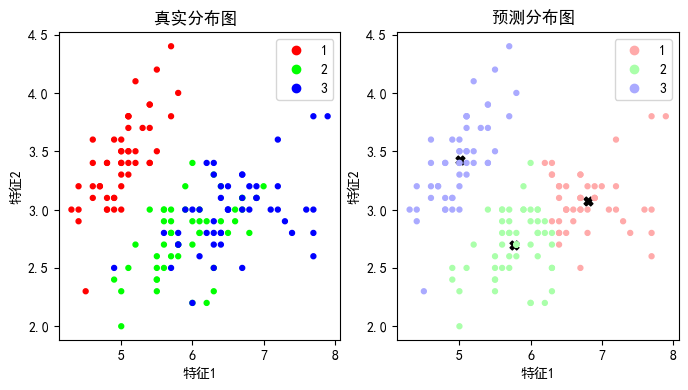

In [103]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# 加载Iris数据集，这是一个常用的机器学习数据集，包括150个样本，每个样本有4个特征，分为3个种类的鸢尾花
iris = load_iris()
X = iris.data[:, :2]  # 选取数据集中的前两个特征（sepal length和sepal width），便于后续的二维可视化
y = iris.target       # 真实的花的种类标签

# 创建自定义的颜色映射，以不同颜色表示不同的花种
cmap_real = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])  # 真实标签的颜色映射
cmap_cluster = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # 聚类结果的颜色映射

# 初始化KMeans算法，设置聚类数量为3（因为鸢尾花数据集有3种花），n_init=10表示算法运行10次初始化中心，选最好的一次作为最终模型
kmeans=KMeans(n_clusters=3,n_init=10)
y_pred=kmeans.fit_predict(X)
print(f"kmeans.inertia_:{kmeans.inertia_}")  #输出模型总的内聚程度，衡量数据的紧密程度，越紧密（小）越好。inertia_属性衡量的是每一个点离最近类中心的距离，然后算其总和
print(X.shape,y.shape)

#画散点图
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
#绘制真实的标签分布图
scatter=plt.scatter(X[:,0],X[:,1],c=y,s=50,marker='.',cmap=cmap_real)
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('真实分布图 ')
plt.legend(handles=scatter.legend_elements()[0],labels=['1','2','3'])

#绘制kmeans预测的标签分布图
plt.subplot(1,2,2)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='k',marker='X') 
scatter=plt.scatter(X[:,0],X[:,1],c=y_pred,s=50,marker='.',cmap=cmap_cluster)
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('预测分布图 ')
plt.legend(handles=scatter.legend_elements()[0],labels=['1','2','3'])

plt.show()

# 案例3：合成的二维数据集并对其进行KMeans聚类

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


kmeans.inertia_:219.69864100348104
pre:[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 1 1 0 1]


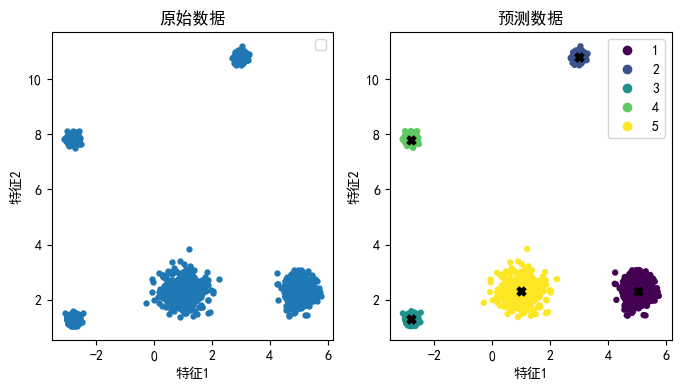

In [104]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
# 一个单元格里面所有变量都会输出
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['font.sans-serif'] = 'SimHei'#宋体，显示中文
plt.rcParams['axes.unicode_minus'] = False

# 定义中心点，这些中心点代表我们想要生成的数据的中心位置
blob_centers = np.array([
    [1, 2.3],   # 第一个中心点
    [5, 2.3],   # 第二个中心点
    [-2.8, 7.8], # 第三个中心点
    [3, 10.8],  # 第四个中心点
    [-2.8, 1.3]  # 第五个中心点
])

# 定义每个簇的标准差，这决定了每个簇中点的散布程度
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# 使用make_blobs生成合成数据集
# n_samples=2000 表示生成2000个数据点
# n_features=2 表示每个数据点有2个特征（二维数据）
# centers=blob_centers 指定簇中心
# cluster_std=blob_std 指定簇的标准差
X, y = make_blobs(n_samples=2000, n_features=2, random_state=42,centers=blob_centers,cluster_std=blob_std)

#模型训练
kmeans=KMeans(n_clusters=5,n_init=10,random_state=42,max_iter=100) 
y_pred=kmeans.fit_predict(X)#不需要标签所以可以直接训练和预测，对数据进行拟合和预测每一个点的标签
print(f"kmeans.inertia_:{kmeans.inertia_}")  #输出模型总的内聚程度，衡量数据的紧密程度，越紧密（小）越好。inertia_属性衡量的是每一个点离最近类中心的距离，然后算其总和
print(f"pre:{y_pre}")

#画散点图
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
#绘制原始的标签分布图
scatter=plt.scatter(X[:,0],X[:,1],s=50,marker='.')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('原始数据')
plt.legend(handles=scatter.legend_elements()[0],labels=['1','2','3'])

#预测标签分布图
plt.subplot(1,2,2)
scatter=plt.scatter(X[:,0],X[:,1],c=y_pred,s=50,marker='.')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='k',marker='X') 
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('预测数据')
plt.legend(handles=scatter.legend_elements()[0],labels=['1','2','3','4','5'])

plt.show()

这段代码首先生成了一个合成数据集，其中包含2000个点，这些点围绕五个预定义的中心点以不同的标准差分布。接着，使用KMeans算法对数据进行聚类，设定目标是形成五个簇。最后，绘制出聚类的结果，其中每个簇用不同的颜色表示，簇的中心用红色星号标记。这样的可视化有助于直观地理解聚类算法的效果。

In [85]:
kmeans.cluster_centers_

array([[ 5.03276522,  2.31971819],
       [ 2.99740734, 10.8007142 ],
       [-2.79494693,  1.29723606],
       [-2.80506909,  7.80806433],
       [ 0.9891165 ,  2.30456527]])

kmeans.cluster_centers_ 是 KMeans 聚类算法中一个非常重要的属性，它包含了每个簇的中心点坐标。在 KMeans 算法中，聚类的目标是最小化每个点到其最近聚类中心的距离的平方和。这些聚类中心是通过迭代过程找到的，该过程尝试找到最佳的中心位置，以使得聚类内的方差最小。

In [86]:
kmeans.inertia_

219.69864100348104

kmeans.inertia_ 表示了聚类结果的总体内聚度，具体来说，是所有点到其最近聚类中心的距离平方和。这个值用于评估聚类效果的好坏：inertia 值越小，说明聚类中的点距离其聚类中心越近，聚类效果越好。

In [87]:
kmeans.score(X)

-219.69864100348104


在 KMeans 聚类中，score(X) 方法返回的是负的 inertia_ 值。这种计算方式提供了一种衡量聚类质量的方法，但这里的分数是负值，因为在 sklearn 中，通常的模式是“更高的分数更好”，而对于 inertia_，我们希望它尽可能地小。

# 案例4：Kmeans算法的优化（Elkan K-Means算法）

kmeans.inertia_:37.05070212765958
pre:[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 1 1 0 1]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


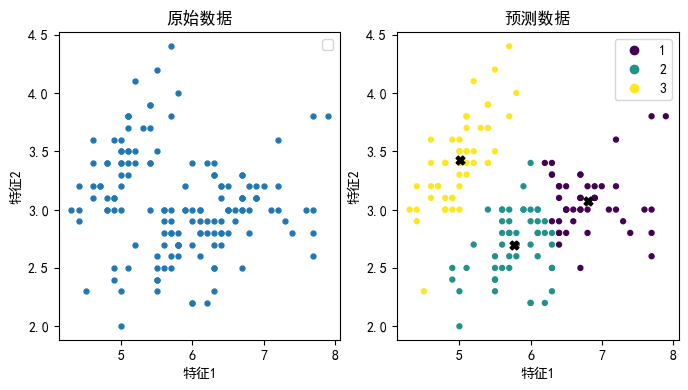

In [105]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 加载Iris数据集
iris = load_iris()
X = iris.data[:, :2]  # 选择前两个特征进行二维聚类
y = iris.target

# 使用KMeans进行聚类，明确指定使用K-Means++初始化中心点，使用elkan算法
kmeans=KMeans(n_clusters=3,n_init=10,algorithm="elkan",init='k-means++',random_state=42,max_iter=100)   #用Elkan K-Means算法
y_pred=kmeans.fit_predict(X)#不需要标签所以可以直接训练和预测，对数据进行拟合和预测每一个点的标签
print(f"kmeans.inertia_:{kmeans.inertia_}")  #输出模型总的内聚程度，衡量数据的紧密程度，越紧密（小）越好。inertia_属性衡量的是每一个点离最近类中心的距离，然后算其总和
print(f"pre:{y_pre}")

#画散点图
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
#绘制原始的标签分布图
scatter=plt.scatter(X[:,0],X[:,1],s=50,marker='.')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('原始数据')
plt.legend(handles=scatter.legend_elements()[0])

#预测标签分布图
plt.subplot(1,2,2)
#cmap='viridis'是彩色的映射
scatter=plt.scatter(X[:,0],X[:,1],c=y_pred,s=50,marker='.',cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='k',marker='X') 
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('预测数据')
plt.legend(handles=scatter.legend_elements()[0],labels=['1','2','3','4','5'])

plt.show()

在每次迭代中，传统的 K-Means 需要计算每个样本点到所有聚类中心的距离，这在数据点和聚类中心数量较多时会导致显著的性能下降。Elkan K-Means 算法通过优化距离计算过程解决了传统 K-Means 算法在大规模数据集上的性能瓶颈。它有效减少了每次迭代中所需进行的距离计算数量，提高了算法的运行速度和效率。

# 案例5：Kmeans算法的优化（MiniBatch K-Means 算法）

kmeans.inertia_:48.462860511333204
pre:[0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0
 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0
 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 1 1 0 1]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


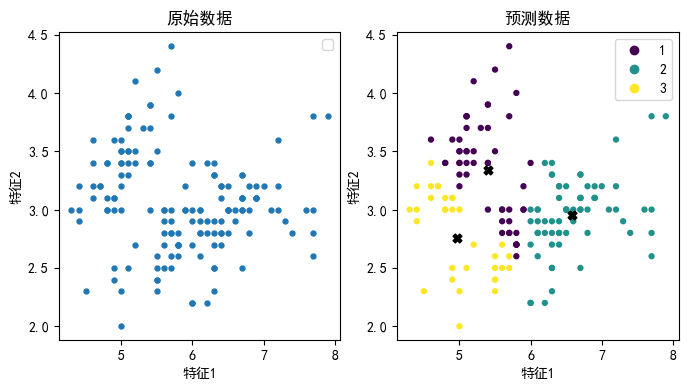

In [106]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# 加载Iris数据集
iris = load_iris()
X = iris.data[:, :2]  # 只使用前两个特征进行二维聚类，便于可视化
y = iris.target

# 使用MiniBatchKMeans进行聚类
# batch_size=20 指定每个批次用于训练的样本数，这是MiniBatchKMeans优化计算效率的关键参数
# n_clusters=3 选择将数据分为3个聚类，与鸢尾花的种类数一致
# random_state=42 设置随机种子以确保结果的可重复性
kmeans=MiniBatchKMeans(n_clusters=3,batch_size=20,init='k-means++',random_state=42) 
y_pred=kmeans.fit_predict(X)#不需要标签所以可以直接训练和预测，对数据进行拟合和预测每一个点的标签
print(f"kmeans.inertia_:{kmeans.inertia_}")  #输出模型总的内聚程度，衡量数据的紧密程度，越紧密（小）越好。inertia_属性衡量的是每一个点离最近类中心的距离，然后算其总和
print(f"pre:{y_pre}")

#画散点图
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
#绘制原始的标签分布图
scatter=plt.scatter(X[:,0],X[:,1],s=50,marker='.')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('原始数据')
plt.legend(handles=scatter.legend_elements()[0])

#预测标签分布图
plt.subplot(1,2,2)
#cmap='viridis'是彩色的映射
scatter=plt.scatter(X[:,0],X[:,1],c=y_pred,s=50,marker='.',cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=40,c='k',marker='X') 
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('预测数据')
plt.legend(handles=scatter.legend_elements()[0],labels=['1','2','3','4','5'])

plt.show()

# 作业：使用聚类算法来分析 Boston 房价数据集的房价分布特性
##### 本作业的目的主要是利用 K-Means 算法对 Boston 房价数据集进行聚类分析。这个分析的目标是将房价分布划分成若干个区间（聚类），以探索和理解数据中潜在的模式或群体。这样的分析可以帮助揭示房价数据的内部结构，例如识别高价或低价房屋区间，以及房价的分布特性。。
#### 1、数据预处理：
##### 首先，准备Boston 房价数据集，以用于聚类分析。
#### 2、聚类实施：
##### 学生需要选择至少一种聚类算法来分析数据集，并探索算法参数对聚类结果的影响。建议的聚类算法包括但不限于：K-Means、DBSCAN、层次聚类。
##### 探索不同的簇数量（n_clusters）对结果的影响，或者尝试不同的初始化方法（init 参数）和迭代次数（n_init 参数）。
#### 3、评估与比较：
##### 使用聚类算法的内聚度（inertia_）和聚类中心（cluster_centers_）来评估聚类结果。比较不同聚类算法和/或算法配置的效果，讨论哪一种配置最适合 Boston 房价数据集。
#### 4、结果解释和可视化：
##### 对聚类结果进行可视化，并探讨不同聚类所代表的房价区间特性。
#### 5、报告提交：
##### 学生需要提交一份详细的报告，包括聚类算法的选择、参数设置、结果的评估以及聚类结果的详细解释。报告应包含所有相关的代码和图表，以确保分析的透明性和可复现性。

[15688.355296226422, 8235.565514657786, 3759.7781833166846, 2474.271038112721, 1807.8622157207533, 1220.8202518739724, 945.6302966209521, 761.3984731122182, 595.8545557029247, 486.10430686948877, 382.2655284571366, 334.88716657105687, 285.2260285643855]


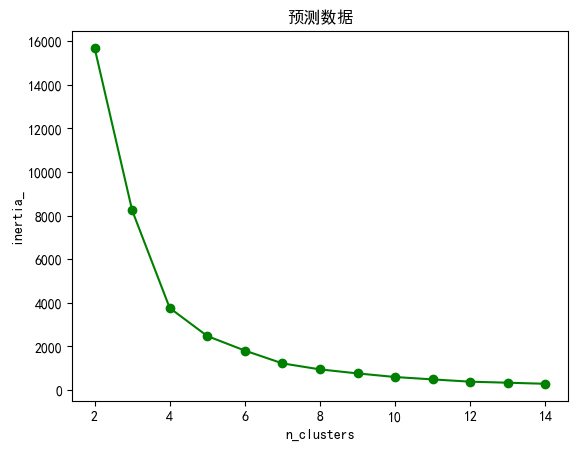

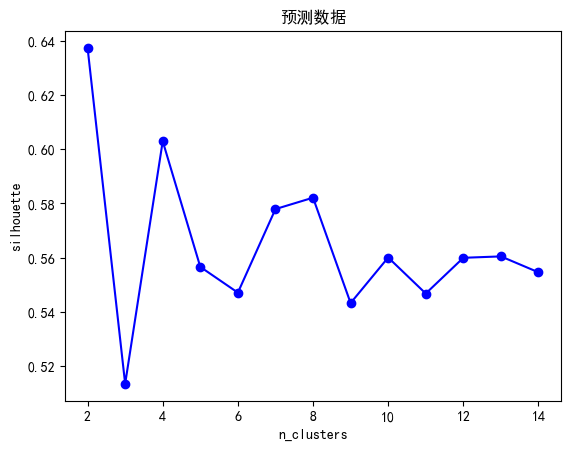

In [47]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  #轮廓系数法

# 从 OpenML 加载波士顿房价数据集
boston = fetch_openml(name='boston', version=1)
X = np.array(boston.data)
y = np.array(boston.target)  # 这里假设目标值 y 为房屋中位数价格

prices_scaled = y.reshape(-1, 1)

#画散点图
# plt.figure(figsize=(8,4))
# plt.subplot(1,2,1)
# #绘制原始的标签分布图
# scatter=plt.scatter(X[:,0],X[:,1],s=50,marker='.')
# plt.xlabel('特征1')
# plt.ylabel('特征2')
# plt.title('原始数据')
# plt.legend(handles=scatter.legend_elements()[0])


# 聚类实现：使用 K-Means 算法
# 尝试不同数量的簇来寻找最优解
inertia=[]
silhouette=[]
n=15
#可视化案例
for i in range(2,n):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) 
    y_pred=kmeans.fit_predict(prices_scaled) #不需要标签所以可以直接训练和预测，对数据进行拟合和预测每一个点的标签
    # print(f"kmeans.inertia_:{kmeans.inertia_}")  #输出模型总的内聚程度，衡量数据的紧密程度，越紧密（小）越好。inertia_属性衡量的是每一个点离最近类中心的距离，然后算其总和
    # print(f"pre:{y_pred}")
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(prices_scaled,y_pred))
print(inertia)



#预测标签分布图
plt.plot(range(2,n),inertia,c='g',marker='o')
plt.xlabel('n_clusters')
plt.ylabel('inertia_')
plt.title('预测数据')
# plt.legend()
plt.show()

plt.plot(range(2,n),silhouette,c='b',marker='o')
plt.xlabel('n_clusters')
plt.ylabel('silhouette')
plt.title('预测数据')
# plt.legend()
plt.show()

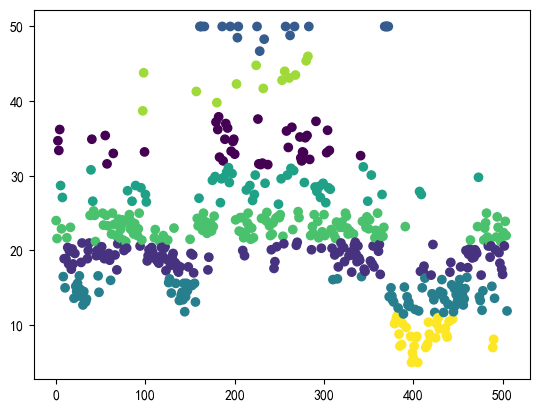

In [46]:
kmeans=KMeans(n_clusters=8,init='k-means++',random_state=42) 
y_pred=kmeans.fit_predict(prices_scaled)

plt.scatter(range(len(prices_scaled)),prices_scaled,c=y_pred,marker='o')
plt.show()